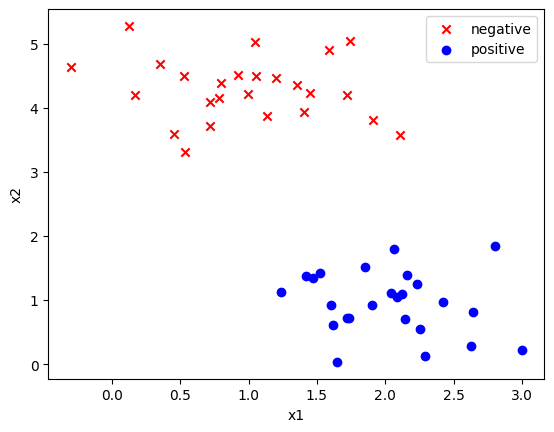

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_gaussian_quantiles
from IPython.display import clear_output


def display_sample(X, y):
    for i, marker in enumerate(['x', 'o']):
        plt.scatter(X[y == i, 0], X[y == i, 1], c=['red', 'blue'][i],
                    marker=marker, label=['negative', 'positive'][i])

    # 设置 x 轴 和 y 轴的范围
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()


def display_contour(X, y, model):
    model.eval()
    clear_output(wait=True)
    x1 = np.linspace(min(X[:, 0]) - 1, max((X[:, 0]) + 1), 100)
    x2 = np.linspace(min(X[:, 1]) - 1, max((X[:, 1]) + 1), 100)
    X1, X2 = np.meshgrid(x1, x2)
    poly_X = np.c_[X1.ravel(), X2.ravel()]
    Z = model(torch.tensor(poly_X, dtype=torch.float)
              ).detach().numpy().reshape(X1.shape)
    display_sample(X.detach().numpy(), y.detach().numpy().squeeze())
    plt.contour(X1, X2, Z, levels=[0.5], alpha=0.5, cmap='viridis')
    plt.show()


X, y = make_blobs(n_samples=50, centers=2, n_features=2,
                  random_state=0, cluster_std=0.5)

display_sample(X, y)

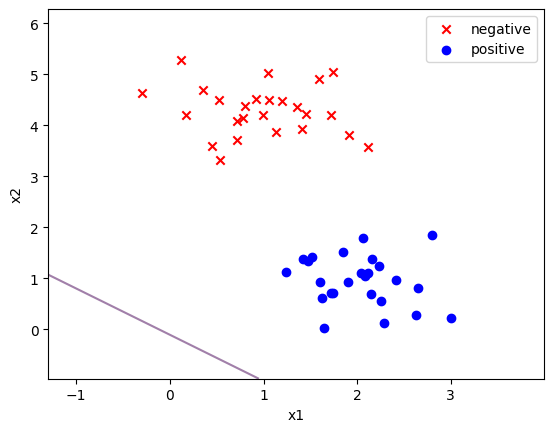

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from IPython.display import clear_output

clear_output(wait=True)


class LogisticRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = torch.sigmoid(self.linear(x))
        return out


model = LogisticRegression(2, 1)
criterion = nn.BCELoss()  # 二分类交叉熵
optimizer = optim.Adam(model.parameters(), lr=0.01)  # SGD 优化器

# 训练模型
num_epochs = 10
inputs = torch.tensor(X, dtype=torch.float32)
labels = torch.tensor(y, dtype=torch.float32).view(-1, 1)

for epoch in range(num_epochs):
    display_contour(inputs, labels, model)
    model.train()
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch +
              1, num_epochs, loss.item()))

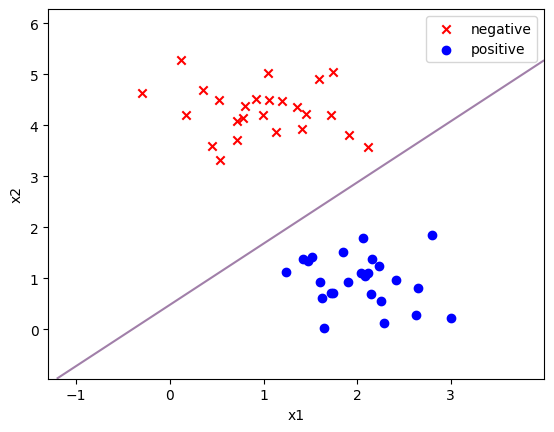

In [47]:
display_contour(inputs, labels, model)